# Aarin Pratap Singh (17CSU003)

# Title Of the Project
Student  Performance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import *

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

In [3]:
#Checking how many entries are unique
data.group.nunique()

5

In [4]:
#It is used to see the first five rows of the data set
data.head()

,gender,group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Checking if the data set is containing any null value
data.isnull().any()

gender                         False
group                          False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
group                          1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Visualization of dataset

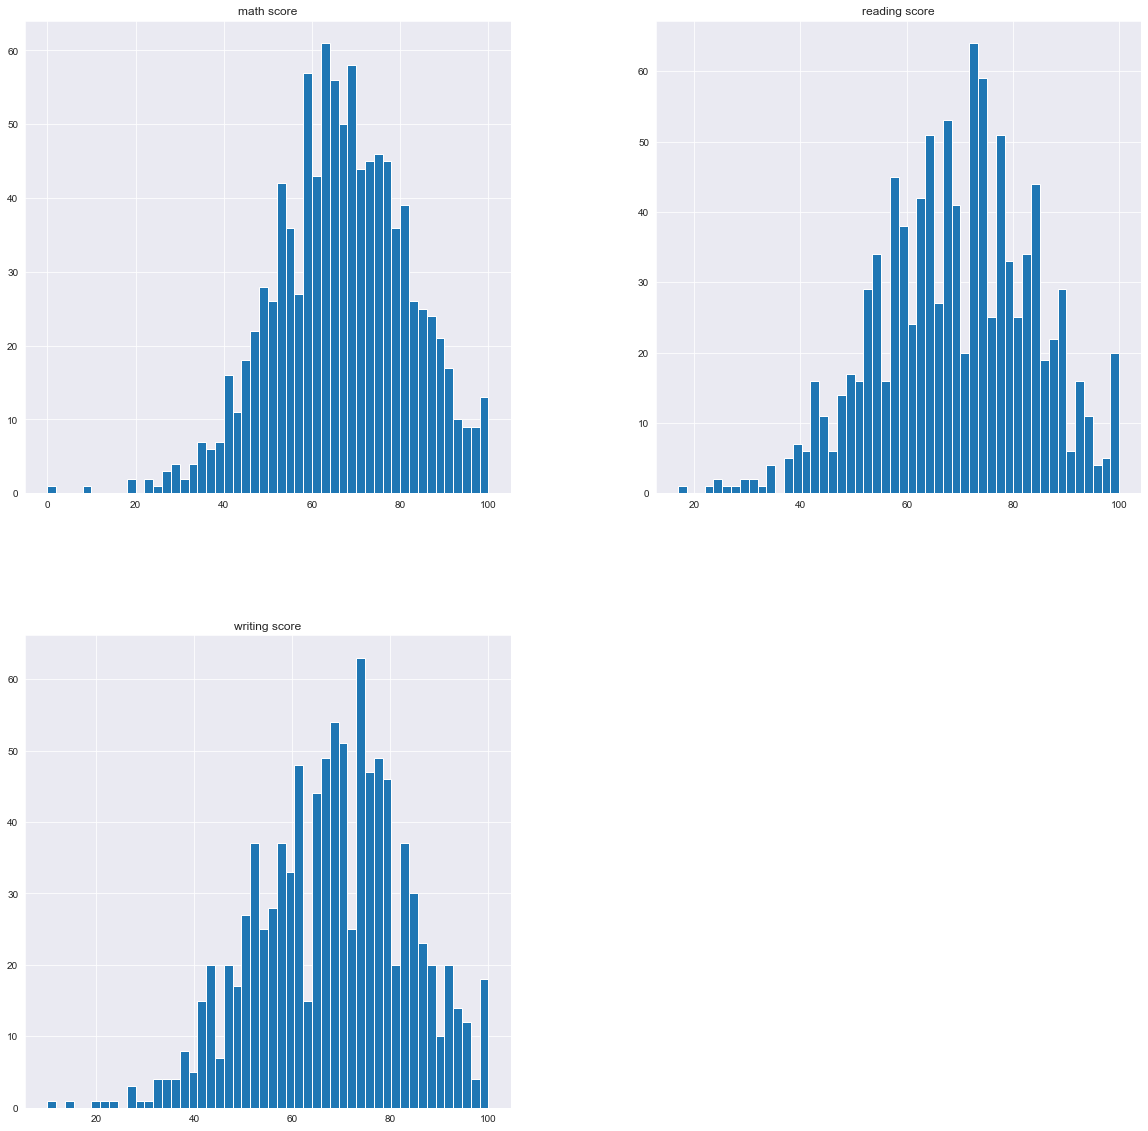

In [8]:
data.hist(bins=50, figsize=(20,20));

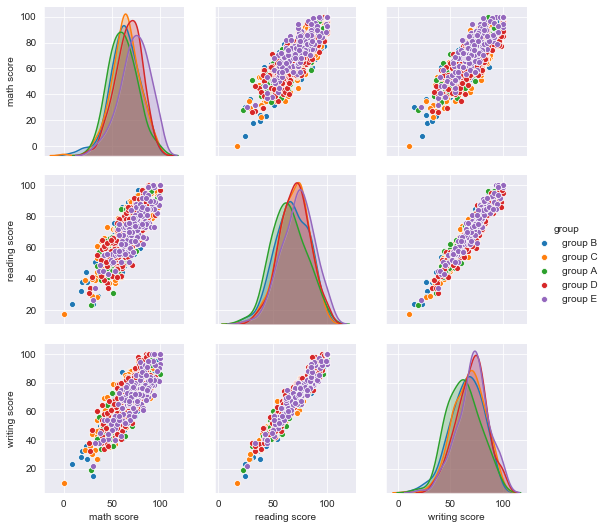

In [9]:
#Visualization of data
g = sns.pairplot(data, hue='group', markers='o')
plt.show()

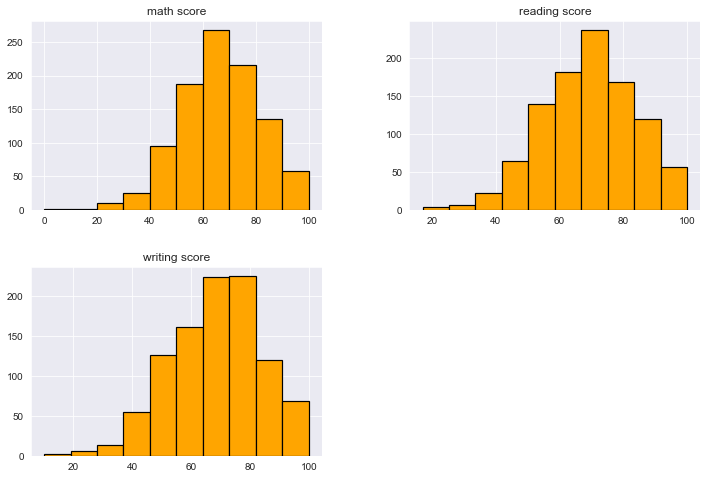

In [10]:
#Visualization of scores
data.hist(edgecolor='black', color='orange', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

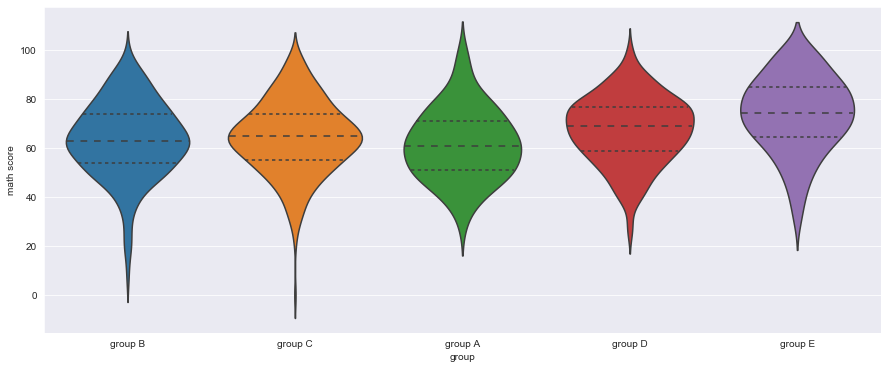

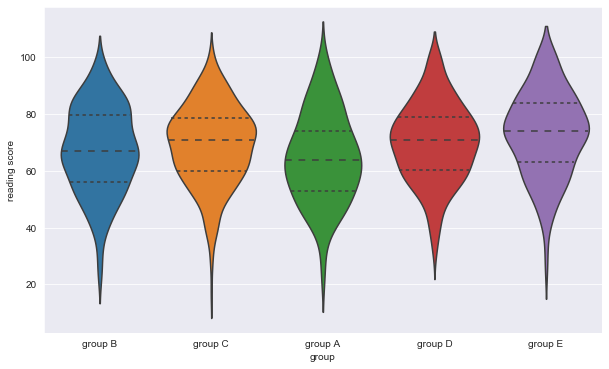

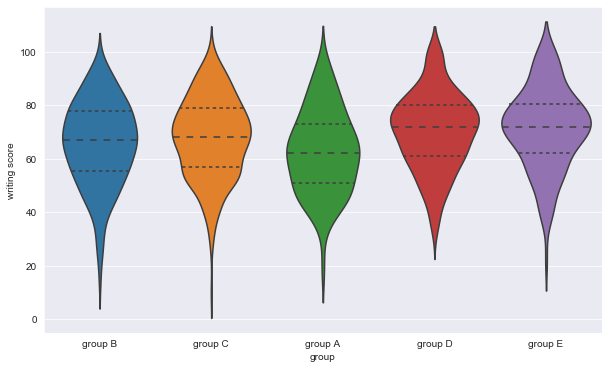

In [11]:
#How math score, reading score and writing score vary according to group
plt.figure(figsize=(15,6))
sns.violinplot(x='group',y='math score',data=data, inner='quartile')
plt.show()
plt.figure(figsize=(10,6))
sns.violinplot(x='group',y='reading score',data=data, inner='quartile')
plt.show()
plt.figure(figsize=(10,6))
sns.violinplot(x='group',y='writing score',data=data, inner='quartile')
plt.show()

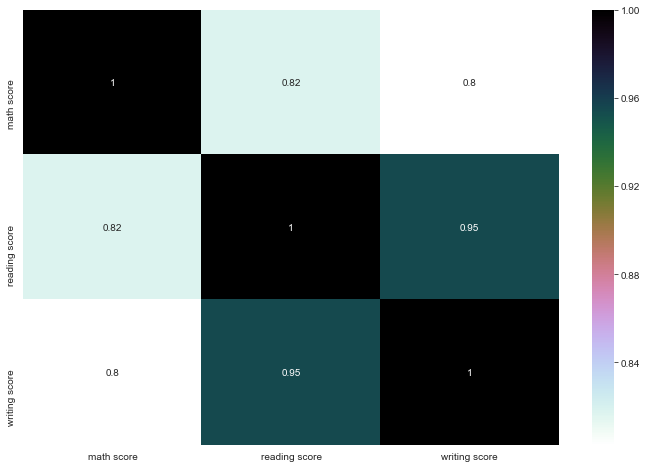

In [12]:
#Correlation between the features
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [13]:
#Splitting the data set
fit_data = data[["reading score", "writing score"]].values
x_data_r = fit_data[:,0].reshape(-1,1)
y_data_w = fit_data[:,1].reshape(-1,1)

fit_data = data[["math score", "writing score"]].values
x_data_m = fit_data[:,0].reshape(-1,1)
y_data_w = fit_data[:,1].reshape(-1,1)

# Regression Techniques

# Linear Regression For High Correlation  

<Figure size 864x576 with 0 Axes>

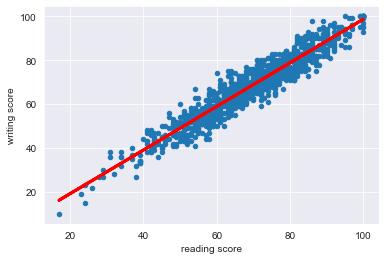

Root mean squared error:  4.524473857741842
R^2 value:  0.9112574888913137


In [14]:
#Linear Regression
regr_r = LinearRegression()
regr_r.fit(x_data_r, y_data_w)
plt.figure(figsize=(12,8))
axes = data.plot(x="reading score", y="writing score", kind="scatter")
plt.plot(x_data_r, regr_r.predict(x_data_r), color='red', linewidth=3)
plt.show()
rmse1 = (np.sqrt(mean_squared_error(y_data_w, regr_r.predict(x_data_r))))
r21 = r2_score(y_data_w, regr_r.predict(x_data_r))
print("Root mean squared error: ", rmse1)
print("R^2 value: ", r21)

#  Linear Regression For Low Correlation

<Figure size 864x576 with 0 Axes>

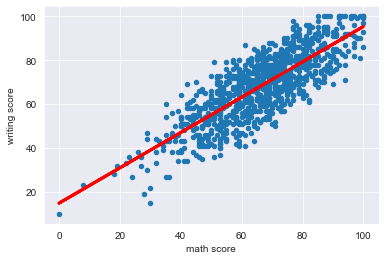

Root mean squared error:  9.059084108855648
R^2 value:  0.6442342539264934


In [15]:
#Linear Regression
regr_m = LinearRegression()
regr_m.fit(x_data_m, y_data_w)
plt.figure(figsize=(12,8))
axes = data.plot(x="math score", y="writing score", kind="scatter")
plt.plot(x_data_m, regr_m.predict(x_data_m), color='red', linewidth=3)
plt.show()
rmse2 = (np.sqrt(mean_squared_error(y_data_w, regr_m.predict(x_data_m))))
r22 = r2_score(y_data_w, regr_m.predict(x_data_m))
print("Root mean squared error: ", rmse2)
print("R^2 value: ", r22)

# Decision Tree Regression For High Correlation

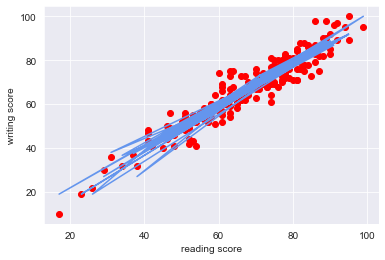

Root mean squared error:  4.981560671482122
R^2 value:  0.8970365190100928


In [16]:
#Decision Tree Regression
X_train, X_test, y_train, y_test = train_test_split(x_data_r, y_data_w, test_size = 0.2, random_state=42)
tree_reg_r = DecisionTreeRegressor(random_state=42)
tree_reg_r.fit(X_train, y_train)
y_pred = tree_reg_r.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, edgecolor="red", c="red")
plt.plot(X_test, y_pred, color="cornflowerblue")
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.show()
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse1 = np.sqrt(tree_mse)
tree_r21 = r2_score(y_test, y_pred)
print("Root mean squared error: ", tree_rmse1)
print("R^2 value: ", tree_r21)

# Decision Tree Regression For Low Correlation
 

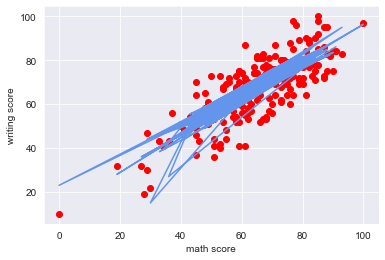

Root mean squared error:  9.657989628767664
R^2 value:  0.6129867463925154


In [17]:
#Decision Tree Regression
X_train, X_test, y_train, y_test = train_test_split(x_data_m, y_data_w, test_size = 0.2, random_state=42)
tree_reg_r = DecisionTreeRegressor(random_state=42)
tree_reg_r.fit(X_train, y_train)
y_pred = tree_reg_r.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, edgecolor="red", c="red")
plt.plot(X_test, y_pred, color="cornflowerblue")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse2 = np.sqrt(tree_mse)
tree_r22 = r2_score(y_test, y_pred)
print("Root mean squared error: ", tree_rmse2)
print("R^2 value: ", tree_r22)

# Random Forest Regression For High Correlation

Estimator:  1 RMSE: 5.111030360451629 R^2:  0.8916149729891087
Estimator:  2 RMSE: 5.018549101626902 R^2:  0.8955018206271979
Estimator:  3 RMSE: 4.951259141520662 R^2:  0.8982853092132124
Estimator:  4 RMSE: 4.925462135933538 R^2:  0.8993424539806171
Estimator:  5 RMSE: 4.995490487069595 R^2:  0.8964598854234114
Estimator:  6 RMSE: 4.940710343233089 R^2:  0.898718259592585
Estimator:  7 RMSE: 4.946745076695496 R^2:  0.8984706913120492
Estimator:  8 RMSE: 4.972953196301478 R^2:  0.8973920260487666
Estimator:  9 RMSE: 5.006506273690051 R^2:  0.8960027397717616
Estimator: 

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column

 10 RMSE: 5.012655801258194 R^2:  0.8957471017056478
Estimator:  11 RMSE: 5.0043335493510765 R^2:  0.8960929856780389
Estimator:  12 RMSE: 5.006563051194205 R^2:  0.8960003809458523
Estimator:  13 RMSE: 5.011468633502664 R^2:  0.8957964771378404
Estimator:  14 RMSE: 4.999638479255543 R^2:  0.8962878655196271
Estimator:  15 RMSE: 5.003079056060777 R^2:  0.8961450742579687
Estimator: 

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column

 16 RMSE: 5.007928010135316 R^2:  0.8959436655667183
Estimator:  17 RMSE: 5.014810493060035 R^2:  0.8956574561550902
Estimator:  18 RMSE: 5.017543130757701 R^2:  0.8955437098610428
Estimator:  19 RMSE: 5.021325272407213 R^2:  0.8953861756363204
Estimator:  20 RMSE: 5.015858523179531 R^2:  0.8956138391308216
Estimator:  21 RMSE: 5.017656793185621 R^2:  0.8955389773097857
Estimator:  22 RMSE: 5.0180497139298685 R^2:  0.8955226164817991
Estimator:  23

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column

 RMSE: 5.0169479133141675 R^2:  0.8955684911201488
Estimator:  24 RMSE: 5.010382995913982 R^2:  0.8958416195965285


C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



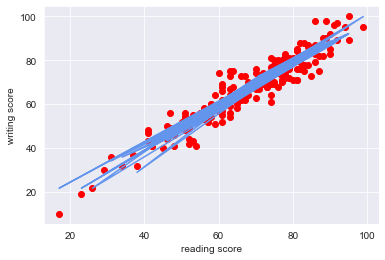

Final estimator value:  [4] RMSE for final estimator value:  [4.925462135933538, 0.8993424539806171]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_data_r, y_data_w, test_size = 0.2, random_state=42)
lst={}
for i in range(1,25):
  forest_reg_p = RandomForestRegressor(n_estimators=i, random_state=42)
  forest_reg_p.fit(X_train, y_train)
  y_pred = forest_reg_p.predict(X_test)
  forest_mse = mean_squared_error(y_test, y_pred)
  forest_rmse = np.sqrt(forest_mse)
  forest_r2 = r2_score(y_test, y_pred)
  lst[i]=[forest_rmse,forest_r2]
  print("Estimator: ", i, end=" ")
  print("RMSE:", forest_rmse, end=' ')
  print("R^2: ",forest_r2)

plt.figure()
plt.scatter(X_test, y_test, edgecolor="red", c="red")
plt.plot(X_test, y_pred, color="cornflowerblue")
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.show()
  
t1=min(lst.values())
res=[key for key in lst if lst[key]==t1]
print("Final estimator value: ", res, end=" ")
print("RMSE for final estimator value: ", t1)

# Random Forest Regression For Low Correlation 

Estimator:  1 RMSE: 10.079031336685444 R^2:  0.5785073948177835
Estimator:  2 RMSE: 9.90983627688249 R^2:  0.5925396747070772
Estimator:  3 RMSE: 9.730253517383094 R^2:  0.607173588032353
Estimator:  4 RMSE: 9.637331935087015 R^2:  0.6146405587114848
Estimator:  5 RMSE: 9.645228424465094 R^2:  0.6140088001680819
Estimator:  6 RMSE: 9.54743261999055 R^2:  0.6217964745708903
Estimator:  7 RMSE: 9.49263556741045 R^2:  0.6261253796930034
Estimator:  8 RMSE: 9.546814069866636 R^2:  0.621845478375108
Estimator:  9 RMSE: 9.55687553965786 R^2:  0.6210479777181226


C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column

Estimator:  10 RMSE: 9.563294670993132 R^2:  0.6205387402101215
Estimator:  11 RMSE: 9.572086339731937 R^2:  0.6198407315697048
Estimator:  12 RMSE: 9.577070624070595 R^2:  0.6194447227692741
Estimator:  13 RMSE: 9.565264562960905 R^2:  0.6203823977151997
Estimator:  14 RMSE: 9.544682376397088 R^2:  0.6220143346073232
Estimator:  15 RMSE: 9.55784004728304 R^2:  0.6209714839817924
Estimator:  16 RMSE: 9.548019807144192 R^2:  0.6217499525184158
Estimator:  17 RMSE: 9.538567545695837 R^2:  0.6224984948723968
Estimator: 

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column

 18 RMSE: 9.563448958026997 R^2:  0.6205264962238131
Estimator:  19 RMSE: 9.574650721596889 R^2:  0.6196370133656528
Estimator:  20 RMSE: 9.557687868639091 R^2:  0.6209835535678313
Estimator:  21 RMSE: 9.552589723566324 R^2:  0.6213877863715411
Estimator:  22 RMSE: 9.547888978226062 R^2:  0.621760318166259
Estimator: 

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column

 23 RMSE: 9.552497690154603 R^2:  0.6213950817347658
Estimator:  24 RMSE: 9.54130604243013 R^2:  0.6222817044512583


C:\Users\arick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



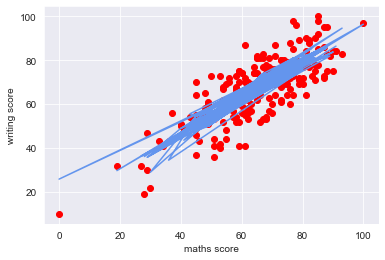

Final estimator value:  [7] RMSE for final estimator value:  [9.49263556741045, 0.6261253796930034]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data_m, y_data_w, test_size = 0.2, random_state=42)
lst={}
for i in range(1,25):
  forest_reg_p = RandomForestRegressor(n_estimators=i, random_state=42)
  forest_reg_p.fit(X_train, y_train)
  y_pred = forest_reg_p.predict(X_test)
  forest_mse = mean_squared_error(y_test, y_pred)
  forest_rmse = np.sqrt(forest_mse)
  forest_r2 = r2_score(y_test, y_pred)
  lst[i]=[forest_rmse,forest_r2]
  print("Estimator: ", i, end=" ")
  print("RMSE:", forest_rmse, end=' ')
  print("R^2: ",forest_r2)

plt.figure()
plt.scatter(X_test, y_test, edgecolor="red", c="red")
plt.plot(X_test, y_pred, color="cornflowerblue")
plt.xlabel("maths score")
plt.ylabel("writing score")
plt.show()
  
t2=min(lst.values())
res=[key for key in lst if lst[key]==t2]
print("Final estimator value: ", res, end=" ")
print("RMSE for final estimator value: ", t2)

# SVR For High Correlation

C:\Users\arick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



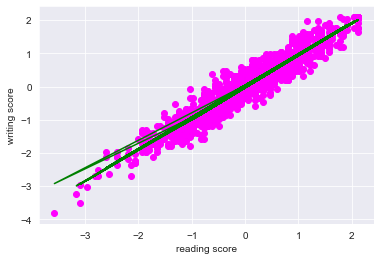

Root mean squared error:  0.3013367646131223
R^2 value:  0.9091961542924957


In [20]:
#SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_data_r)
y = sc_y.fit_transform(y_data_w)
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()
svrrmse1 = (np.sqrt(mean_squared_error(X,y)))
svrr21 = r2_score(X,y)
print("Root mean squared error: ", svrrmse1)
print("R^2 value: ", svrr21)

# SVR  For Low Correlation

C:\Users\arick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



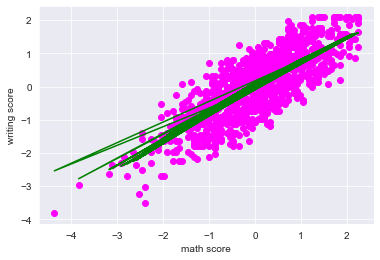

Root mean squared error:  0.6282642024661156
R^2 value:  0.6052840918996157


In [21]:
#SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_data_m)
y = sc_y.fit_transform(y_data_w)
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.show()
svrrmse2 = (np.sqrt(mean_squared_error(X,y)))
svrr22 = r2_score(X,y)
print("Root mean squared error: ", svrrmse2)
print("R^2 value: ", svrr22)

# Classification Models

In [22]:
reading=data[['reading score','writing score','math score','group']]
math=data[['math score','writing score','reading score','group']]

In [46]:
#Splitting the data set
train_r,test_r=train_test_split(reading,test_size=0.3,random_state=0)  
train_x_r=train_r[['reading score','writing score','math score']]
train_y_r=train_r.group
test_x_r=test_r[['reading score','writing score','math score']]
test_y_r=test_r.group

train_m,test_m=train_test_split(math,test_size=0.3,random_state=0)  
train_x_m=train_m[['math score','writing score','reading score']]
train_y_m=train_m.group
test_x_m=test_m[['math score','writing score','reading score']]
test_y_m=test_m.group

   # Logistic Regression

In [24]:
#Logistic Regression
model = LogisticRegression()

model.fit(train_x_r,train_y_r) 
prediction=model.predict(test_x_r) 
LR_AccuScore_r=metrics.accuracy_score(prediction,test_y_r)
print('The accuracy of the Logistic Regression using reading score, writing score and math score is:',LR_AccuScore_r)
print(confusion_matrix(test_y_r, prediction))
print(classification_report(test_y_r, prediction))



The accuracy of the Logistic Regression using reading score, writing score and math score is: 0.33
[[ 0  0 16  5  0]
 [ 0  1 45  5  5]
 [ 0  0 68 20  9]
 [ 0  0 55 24  8]
 [ 0  0 23 10  6]]
              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        21
     group B       1.00      0.02      0.04        56
     group C       0.33      0.70      0.45        97
     group D       0.38      0.28      0.32        87
     group E       0.21      0.15      0.18        39

    accuracy                           0.33       300
   macro avg       0.38      0.23      0.20       300
weighted avg       0.43      0.33      0.27       300



C:\Users\arick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\arick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\arick\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [40]:
model.fit(train_x_m,train_y_m) 
prediction=model.predict(test_x_m) 
LR_AccuScore_m=metrics.accuracy_score(prediction,test_y_m)
print('The accuracy of the Logistic Regression using math score, writing score and reading score is:',LR_AccuScore_m)
print(confusion_matrix(test_y_m,prediction))
print(classification_report(test_y_m,prediction))

The accuracy of the Logistic Regression using math score, writing score and reading score is: 0.3233333333333333
[[ 0  1 18  2  0]
 [ 0  6 42  8  0]
 [ 1  8 71 15  2]
 [ 1  6 60 18  2]
 [ 0  2 28  7  2]]
              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        21
     group B       0.26      0.11      0.15        56
     group C       0.32      0.73      0.45        97
     group D       0.36      0.21      0.26        87
     group E       0.33      0.05      0.09        39

    accuracy                           0.32       300
   macro avg       0.26      0.22      0.19       300
weighted avg       0.30      0.32      0.26       300



C:\Users\arick\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



# Decision Tree Classifier

In [60]:

model=DecisionTreeClassifier()
model.fit(train_x_r,train_y_r) 
prediction=model.predict(test_x_r) 
DT_AccuScore_r=metrics.accuracy_score(prediction,test_y_r)
print('The accuracy of the Decision Tree using reading score, writing score and math score is:',DT_AccuScore_r)
print(confusion_matrix(test_y_r, prediction))
print(classification_report(test_y_r, prediction))



The accuracy of the Decision Tree using reading score, writing score and math score is: 0.21666666666666667
[[ 2  4  9  3  3]
 [ 6 10 19 11 10]
 [10 16 32 25 14]
 [12 18 19 17 21]
 [ 4  7 16  8  4]]
              precision    recall  f1-score   support

     group A       0.06      0.10      0.07        21
     group B       0.18      0.18      0.18        56
     group C       0.34      0.33      0.33        97
     group D       0.27      0.20      0.23        87
     group E       0.08      0.10      0.09        39

    accuracy                           0.22       300
   macro avg       0.18      0.18      0.18       300
weighted avg       0.23      0.22      0.22       300



In [59]:

model.fit(train_x_m,train_y_m) 
prediction=model.predict(test_x_m) 
DT_AccuScore_m=metrics.accuracy_score(prediction,test_y_m)
print('The accuracy of the Decision Tree using math score writing score and math score is:',DT_AccuScore_m)
print(confusion_matrix(test_y_m,prediction))
print(classification_report(test_y_m,prediction))

The accuracy of the Decision Tree using math score writing score and math score is: 0.22
[[ 1  4  9  4  3]
 [ 5 11 18 14  8]
 [ 9 16 30 26 16]
 [16 15 22 19 15]
 [ 5  7 17  5  5]]
              precision    recall  f1-score   support

     group A       0.03      0.05      0.04        21
     group B       0.21      0.20      0.20        56
     group C       0.31      0.31      0.31        97
     group D       0.28      0.22      0.25        87
     group E       0.11      0.13      0.12        39

    accuracy                           0.22       300
   macro avg       0.19      0.18      0.18       300
weighted avg       0.24      0.22      0.23       300



# K-Nearest Neighbours

In [53]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_r,train_y_r) 
prediction=model.predict(test_x_r) 
KNN_AccuScore_r=metrics.accuracy_score(prediction,test_y_r)
print('The accuracy of the KNN using reading score, writing score is:',KNN_AccuScore_r)
print(confusion_matrix(test_y_r, prediction))
print(classification_report(test_y_r, prediction))

The accuracy of the KNN using reading score, writing score is: 0.17666666666666667
[[ 1  8 10  1  1]
 [10 11 21  9  5]
 [19 25 25 21  7]
 [18 19 34 11  5]
 [ 9  9  8  8  5]]
              precision    recall  f1-score   support

     group A       0.02      0.05      0.03        21
     group B       0.15      0.20      0.17        56
     group C       0.26      0.26      0.26        97
     group D       0.22      0.13      0.16        87
     group E       0.22      0.13      0.16        39

    accuracy                           0.18       300
   macro avg       0.17      0.15      0.16       300
weighted avg       0.20      0.18      0.18       300



In [51]:

model.fit(train_x_m,train_y_m) 
prediction=model.predict(test_x_m) 
KNN_AccuScore_m=metrics.accuracy_score(prediction,test_y_m)
print('The accuracy of the KNN using math score and writing score is:',KNN_AccuScore_m)
print(confusion_matrix(test_y_m,prediction))
print(classification_report(test_y_m,prediction))

The accuracy of the KNN using math score and writing score is: 0.3233333333333333
[[ 0  1 18  2  0]
 [ 0  6 42  8  0]
 [ 1  8 71 15  2]
 [ 1  6 60 18  2]
 [ 0  2 28  7  2]]
              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        21
     group B       0.26      0.11      0.15        56
     group C       0.32      0.73      0.45        97
     group D       0.36      0.21      0.26        87
     group E       0.33      0.05      0.09        39

    accuracy                           0.32       300
   macro avg       0.26      0.22      0.19       300
weighted avg       0.30      0.32      0.26       300



C:\Users\arick\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



# SVM

In [50]:

model=svm.SVC()
model.fit(train_x_r,train_y_r) 
prediction=model.predict(test_x_r) 
SVM_AccuScore_r=metrics.accuracy_score(prediction,test_y_r)
print('The accuracy of the SVM using reading score and writing score is:',SVM_AccuScore_r)
print(confusion_matrix(test_y_r, prediction))
print(classification_report(test_y_r, prediction))

The accuracy of the SVM using reading score and writing score is: 0.3233333333333333
[[ 0  1 18  2  0]
 [ 0  6 42  8  0]
 [ 1  8 71 15  2]
 [ 1  6 60 18  2]
 [ 0  2 28  7  2]]
              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        21
     group B       0.26      0.11      0.15        56
     group C       0.32      0.73      0.45        97
     group D       0.36      0.21      0.26        87
     group E       0.33      0.05      0.09        39

    accuracy                           0.32       300
   macro avg       0.26      0.22      0.19       300
weighted avg       0.30      0.32      0.26       300



C:\Users\arick\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [48]:

model=svm.SVC()
model.fit(train_x_m,train_y_m) 
prediction=model.predict(test_x_m)
SVM_AccuScore_m=metrics.accuracy_score(prediction,test_y_m)
print('The accuracy of the SVM using math score and writing score is:',SVM_AccuScore_m)
print(confusion_matrix(test_y_m,prediction))
print(classification_report(test_y_m,prediction))

The accuracy of the SVM using math score and writing score is: 0.3233333333333333
[[ 0  1 18  2  0]
 [ 0  6 42  8  0]
 [ 1  8 71 15  2]
 [ 1  6 60 18  2]
 [ 0  2 28  7  2]]
              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        21
     group B       0.26      0.11      0.15        56
     group C       0.32      0.73      0.45        97
     group D       0.36      0.21      0.26        87
     group E       0.33      0.05      0.09        39

    accuracy                           0.32       300
   macro avg       0.26      0.22      0.19       300
weighted avg       0.30      0.32      0.26       300



C:\Users\arick\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

